# **Capstone project: Providing data-driven suggestions for HR**

## **1. Planning Stage**



### Import packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset


In [ ]:
# Load dataset into a dataframe
data = pd.read_csv("/content/drive/My Drive/Data Analytics/7. Capstone/Activity/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [ ]:
# Display all column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns
data = data.rename(columns = {'satisfaction_level':'satisfaction_lvl',
                       'number_project': 'num_project',
                       'average_montly_hours':'avg_month_hrs',
                       'time_spend_company':'working_yrs',
                       'Work_accident':'work_accident',
                       'promotion_last_5years':'promoted_in_5yrs',
                       'Department':'department'})

# Display all column names after the update
data.columns

Index(['satisfaction_lvl', 'last_evaluation', 'num_project', 'avg_month_hrs',
       'working_yrs', 'work_accident', 'left', 'promoted_in_5yrs',
       'department', 'salary'],
      dtype='object')

### Check missing values

In [ ]:
# Check for missing values
num_na = data.isna().any(axis = 0).sum()
print('Number of Missing values:', num_na)

Number of Missing values: 0


### Check duplicates

In [ ]:
# Check for duplicates
num_dup = data.duplicated().sum()
print('Number of Duplicates: ', num_dup)

Number of Duplicates:  3008


In [ ]:
# Inspect some rows containing duplicates as needed
data[data.duplicated()].head()

,satisfaction_lvl,last_evaluation,num_project,avg_month_hrs,working_yrs,work_accident,left,promoted_in_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data_nom = data.drop_duplicates()


# Count the number of duplicates in a new dataset
num_dup2 = data_nom.duplicated().sum()
print('Number of Duplicates: ', num_dup2)

Number of Duplicates:  0


### Check outliers

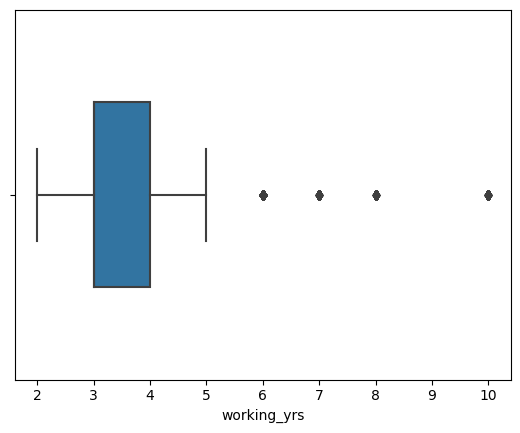

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data = data_nom, x = 'working_yrs', width = .5);

In [ ]:
# Print summary statistics for `working_yrs` variable
data_nom['working_yrs'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: working_yrs, dtype: float64

In [ ]:
# Create an IQR for `working_yrs` variable
iqr = data_nom['working_yrs'].quantile(.75) - data_nom['working_yrs'].quantile(.25)

# Define upper limit and lower limit values based on the IQR range calculated above
upper_limit = data_nom['working_yrs'].quantile(.75) + 1.5 * iqr
lower_limit = data_nom['working_yrs'].quantile(.25) - 1.5 * iqr
upper_limit, lower_limit

(5.5, 1.5)

In [ ]:
# Determine the number of rows containing outliers
outliers = data_nom[(data_nom['working_yrs'] < lower_limit) | (data_nom['working_yrs'] > upper_limit)]['working_yrs'].count()

print('Number of outliers for "working_yrs" variable: ', outliers)

Number of outliers for "working_yrs" variable:  824


# 2. Analyze Stage



## Data Exploration (Continue EDA)



In [ ]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_exit = data_nom['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
pct_exit = data_nom['left'].value_counts(normalize = True)

print('Number of people who left:', num_exit[0])
print('Number of people who stayed:', num_exit[1])
print('Percentage of people who left:', round(pct_exit[0]*100, 2))
print('Percentage of people who stayed:', round(pct_exit[1]*100, 2))

Number of people who left: 10000
Number of people who stayed: 1991
Percentage of people who left: 83.4
Percentage of people who stayed: 16.6


### Data visualizations

You could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

### 1. `avg_month_hrs` vs. `num_project`
- Look into the relationship between the number of projects an employee contributes to and the mean working hours per month, using a boxplot
- Add a stacked histogram to visualize the distribution of `num_project` for those who stayed and those who left in order to complement the fact that boxplot cannot visualize the sample size

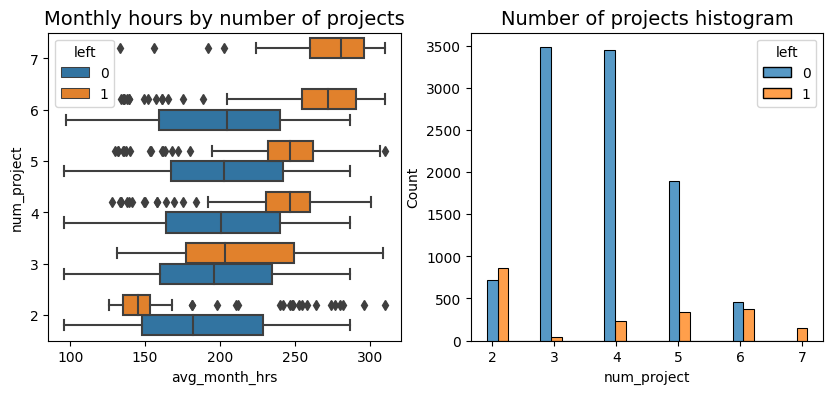

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=data_nom, x='avg_month_hrs', y='num_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = data_nom[data_nom['left']==0]['num_project']
tenure_left = data_nom[data_nom['left']==1]['num_project']
sns.histplot(data=data_nom, x='num_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()



**Observation 1.** There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

**Observation 2.** Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.

**Observation 3.** The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

**Observation 4.** Assuming a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.


- Confirm that all employees with seven projects left the company.

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
print(data_nom[data_nom['num_project']==7]['left'].value_counts())

1    145
Name: left, dtype: int64


This confirms that all employees with 7 projects did leave.

###2. `avg_month_hrs` vs. `satisfaction_lvl`


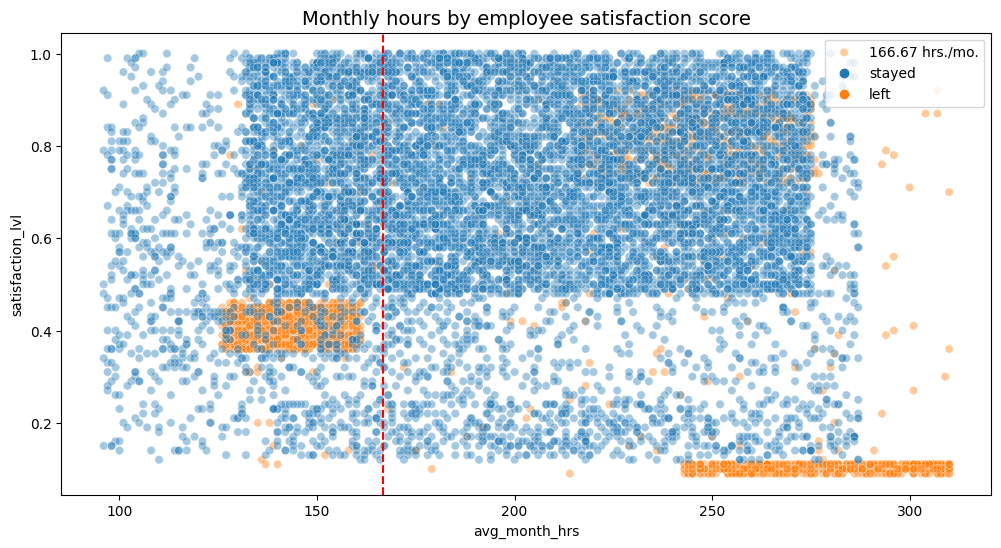

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_nom, x='avg_month_hrs', y='satisfaction_lvl', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by employee satisfaction score', fontsize='14');

**Observation 1.** There is a pretty big group of employees who worked 240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's hihgly likely that such extreme working hours are associated with their satisfaction level being practically zero.

**Observation 2.** Interestingly, there is another group of employees who left the company, but they worked less than the average monthly working hours. Despite less working hours, their satisfaction level is only around 0.4. It's difficult to speculate about why they might have left.

**Observation 3.** Among those who stayed, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

### 3. `satisfaction_lvl` vs. `working_yrs`

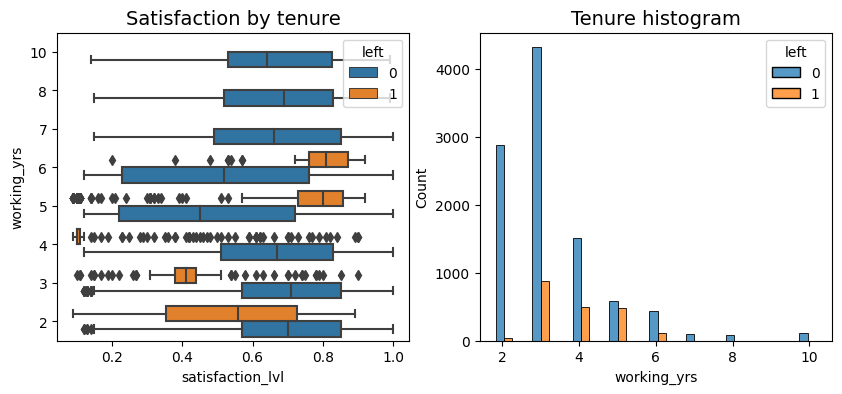

In [ ]:
# Create a plot as needed

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=data_nom, x='satisfaction_lvl', y='working_yrs', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = data_nom[data_nom['left']==0]['working_yrs']
tenure_left = data_nom[data_nom['left']==1]['working_yrs']
sns.histplot(data=data_nom, x='working_yrs', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

**Observation 1.** Employees who left fall into two general categories: (A) dissatisfied employees with shorter tenures; and (B) very satisfied employees with medium-length tenures.

**Observation 2.** Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

**Observation 3.** The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

**Observation 4.** The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.


- Compare the satisfaction level of employees between those who stayed and left.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
data_nom.groupby(['left'])['satisfaction_lvl'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


- It proves that both the mean and median satisfaction levels of employees who left are lower than those of employees who stayed.



### 4. `salary` vs. `working_yrs`

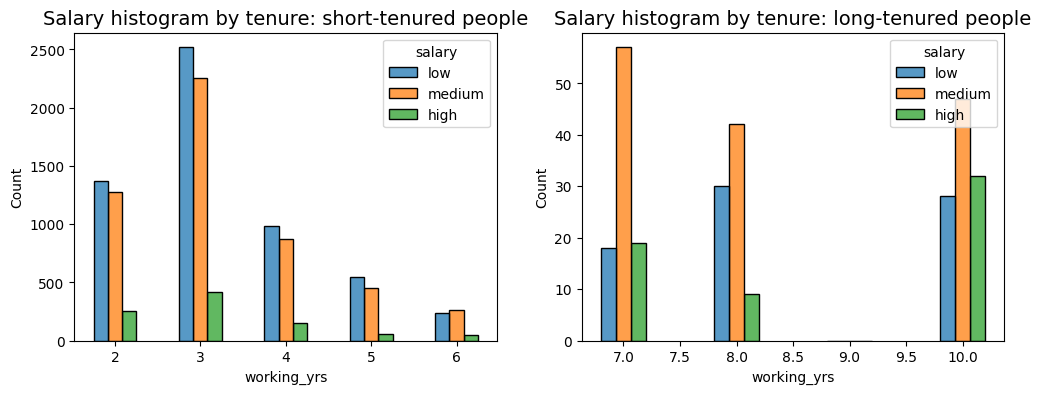

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Define short-tenured employees
tenure_short = data_nom[data_nom['working_yrs'] < 7]

# Define long-tenured employees
tenure_long = data_nom[data_nom['working_yrs'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='working_yrs', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='working_yrs', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

**Observation 1**. The plots show that long-tenured employees were not disproportionately comprised of higher-paid employees.


### 5. `avg_month_hrs` vs. `last_evaluation`.

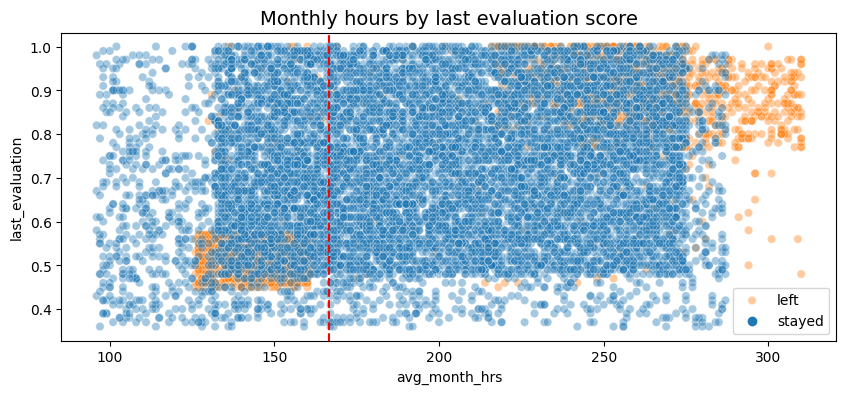

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data_nom, x='avg_month_hrs', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Observation 1**. There are two groups of employees who left: (A) those who overworked and received very high evaluation score; and (B) those who worked less than the average working hours (166.67 hrs) and received lower evaluation score.
**Observation 2**. There seems to be a correlation between hours worked and evaluation score.
**Observation 3**. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

### 6. `avg_month_hrs` vs. `promoted_in_5yrs`

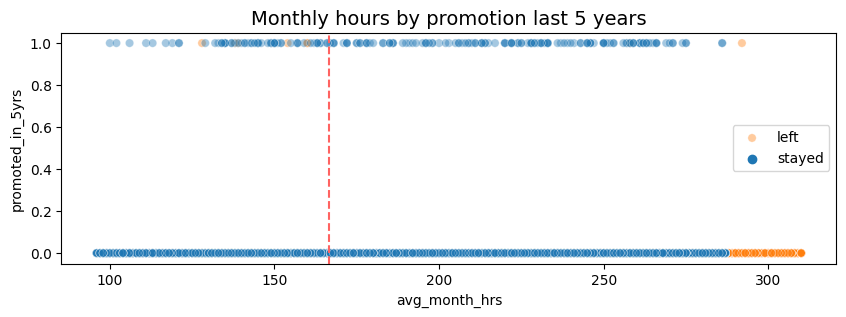

In [ ]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(10, 3))
sns.scatterplot(data=data_nom, x='avg_month_hrs', y='promoted_in_5yrs', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**Observation 1**. Most employees who were promoted in the last 5 years stayed.

**Observation 2**. A few employees who worked the most hours were promoted.

**Observation 3**. All of the employees who left were working the longest hours  


### 7. `department` vs. `left`

In [ ]:
# Display counts for each department
data_nom["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

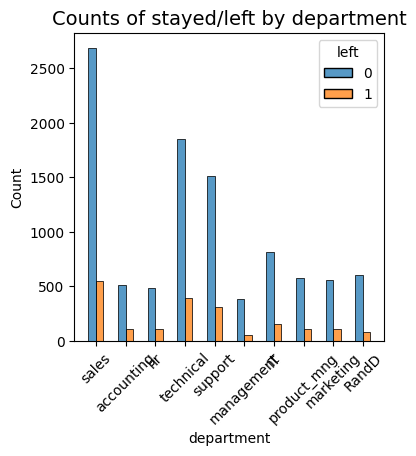

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(4,4))
sns.histplot(data=data_nom, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

**Observation 1**. There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.


### 8. Correlation between variables

<ipython-input-27-329851f09734>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data_nom.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


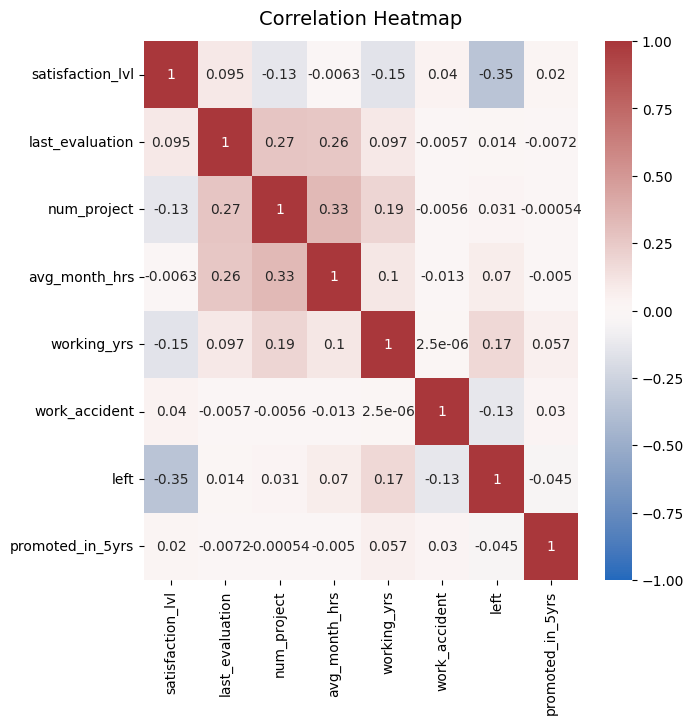

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(7, 7))
heatmap = sns.heatmap(data_nom.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

**Observation 1**. The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### SUMMARY OF EDA


It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## **3. Model Building Stage**


#### A. Logistic Regression



In [ ]:
# Copy the dataset
data_reg = data_nom.copy()

# Encode the `salary` column as an ordinal numeric category
data_reg['salary'] = (
    data_reg['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
data_reg = pd.get_dummies(data_reg, drop_first=False)

# Display the new dataframe
data_reg.head()


,satisfaction_lvl,last_evaluation,num_project,avg_month_hrs,working_yrs,work_accident,left,promoted_in_5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


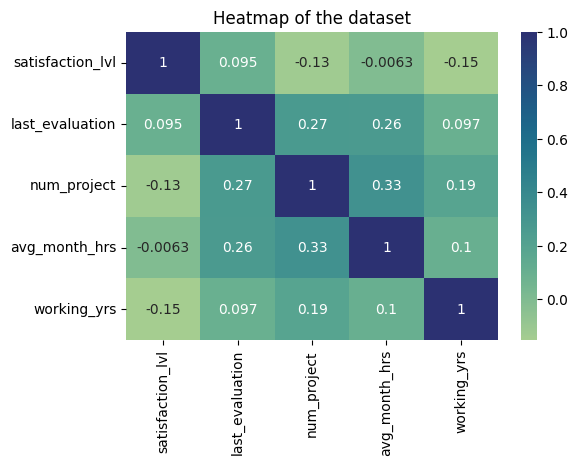

In [ ]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6, 4))
sns.heatmap(data_reg[['satisfaction_lvl', 'last_evaluation', 'num_project', 'avg_month_hrs', 'working_yrs']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

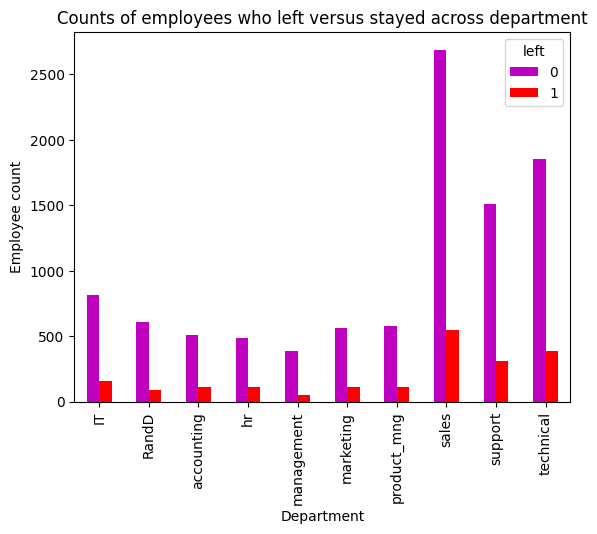

In [ ]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(data_nom['department'], data_nom['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [ ]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
data_reg = data_reg[(data_reg['working_yrs'] >= lower_limit) & (data_reg['working_yrs'] <= upper_limit)]

# Display first few rows of new dataframe
data_reg.head()

,satisfaction_lvl,last_evaluation,num_project,avg_month_hrs,working_yrs,work_accident,left,promoted_in_5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Isolate the outcome variable
y = data_reg['left']

# Select the features you want to use in your model
X = data_reg.drop('left', axis=1)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [ ]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

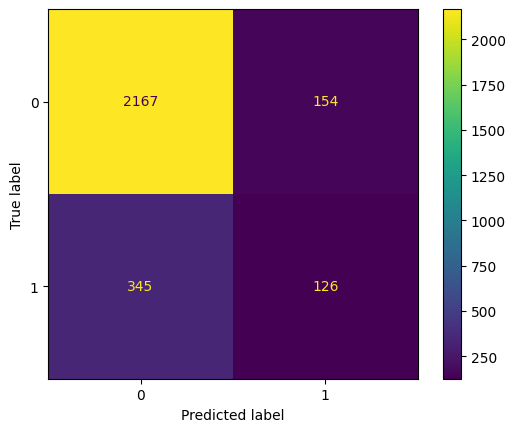

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [ ]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



- The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### B. Tree-based Model


In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 6.95 s, sys: 0 ns, total: 6.95 s
Wall time: 7.43 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'accuracy', 'roc_auc', 'recall'})

In [ ]:
# Check best parameters
print(tree1.best_params_)

# Check best AUC score on CV
print(tree1.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9738070859906354


In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.959115,0.912839,0.935275,0.978747,0.973807


- All of these scores from the decision tree model are strong indicators of good model performance.

## 4. Results and Evaluation

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set.

### Conclusion

- The models and the feature importances extracted from the models confirm that employees at the company are overworked.

- To retain employees, the following recommendations could be presented to the stakeholders:



> 1.  Cap the number of projects that employees can work on.



> 2. Consider promoting employees who have been with the company for at least 3-4 years.



> 3. Properly reward employees for working overtime.



> 4. Consier a proportionate scale for rewarding employees (especially evaluation scores) who contribute more and put in more effort.

